In [7]:
## Import necessary libraries
# Pandas for reading .csv
# Numpy for complex math
# Matplotlib for graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [8]:
def length(loc1,loc2):
    x1 = loc1[0]
    y1 = loc1[1]
    z1 = loc1[2]
    x2 = loc2[0]
    y2 = loc2[1]
    z2 = loc2[2]
    a = x1-x2
    b = y1-y2
    c = z1-z2
    return np.sqrt(a**2+b**2+c**2)

def slope(x1,x2,y1,y2):
    return (y2-y1)/(x2-x1)

def invert_slope(slp):
    return -(1/slp)

def cube_root(num):
    return num ** (1. / 3)

def draw_circle(sub_ax,x,y,r):
    circle = patches.Circle((x,y),r,linewidth=2,edgecolor='r',facecolor='none')
    sub_ax.add_patch(circle)
    
def translate(pos1, trans, scalar):
    trans = np.multiply(scalar, trans)
    return [pos1[0]+trans[0],pos1[1]+trans[1],pos1[2]+trans[2]]

def rotate2d(loc, theta):
    radians = np.deg2rad(theta)
    nX = (loc[0]*np.cos(radians))-(loc[1]*np.sin(radians))
    nY = (loc[1]*np.cos(radians))+(loc[0]*np.sin(radians))
    #if nY < 0.000000001:
    #    nY = 0
    return [nX,nY,loc[2]]

def intersect(line1,line2):
    m1 = line1[0]
    b1 = line1[1]
    m2 = line2[0]
    b2 = line2[1]
    x = (b2-b1)/(m1-m2)
    y = m1*x+b1
    return [x,y]

def lineFromPoints(pt1,pt2):
    x1 = pt1[0]
    y1 = pt1[1]
    x2 = pt2[0]
    y2 = pt2[1]
    m = (y2-y1)/(x2-x1)
    b = y1-(x1*m)
    return [m,b]

def angle2slope(angle):
    radians = np.deg2rad(angle)
    return 1/(np.tan(radians))

def hr_line(line):
    return "y="+str(line[0])+"x+"+str(line[1])

In [9]:
#mineral_locations = [[81.28,162.56,0],[121.92,121.92,0],[162.56,81.28,0]] #0: left 1: middle 2: right
#mineral_locations = [[-162.56,81.28,0],[-121.92,121.92,0],[-81.28,162.56,0]] #0: left 1: middle 2: right
mineral_locations = [[-62.2358, -118.008,0],[-89.293, -91.9572,0],[-118.008, -62.2358,0]] #0: left 1: middle 2: right
#mineral_locations[1] = [-90.6251, -90.6251, 0]
#mineral_locations[1] = [-9.56397*10, -8.43464*10, 0]
#mineral_locations[1] = [-91.4759,-91.0661, 0]

mineral_width = 3.5
camera_data = pd.read_csv('data_files/ScaledLocs.csv',index_col=0)
num_images = camera_data.shape[0]
parsed_data = []
camera_data_list = camera_data.values
for i in range(0,num_images):
    image_loc = 'data_files/000'+str(i+1)+'.png'
    img = mpimg.imread(image_loc)
    parsed_data.append([camera_data_list[i],img])
camera_data.head()
#print mineral_locations

,x,y,z,xr,yr,zr
frame,,,,,,
1,-45.01910,-18.26810,21.248,0,0,173.4930
2,-28.55930,-11.93800,21.248,0,0,167.0320
3,-58.83100,-5.88361,21.248,0,0,179.8480
4,-10.04920,-31.99800,21.248,0,0,101.5520
5,-7.52653,-53.18820,21.248,0,0,94.7091


In [10]:
print parsed_data[0][0]

[-45.0191 -18.2681  21.248    0.       0.     173.493 ]


In [11]:
## Old try
'''
dist = length(parsed_data[0][0],mineral_locations[1])
print dist
theta = np.degrees(np.arctan(mineral_width/dist))
print theta

slope = slope(parsed_data[0][0][0],mineral_locations[1][0],parsed_data[0][0][1],mineral_locations[1][0])
slope_inv = invert_slope(slope)
print slope
print slope_inv
b = -(slope_inv*mineral_locations[1][0])+mineral_locations[1][1]
b2 = np.arctan(b) % 
'''

'\ndist = length(parsed_data[0][0],mineral_locations[1])\nprint dist\ntheta = np.degrees(np.arctan(mineral_width/dist))\nprint theta\n\nslope = slope(parsed_data[0][0][0],mineral_locations[1][0],parsed_data[0][0][1],mineral_locations[1][0])\nslope_inv = invert_slope(slope)\nprint slope\nprint slope_inv\nb = -(slope_inv*mineral_locations[1][0])+mineral_locations[1][1]\nb2 = np.arctan(b) % \n'

In [12]:
def calc_x_loc(data_num,fov,mineral_num, log_enabled):
    # Store original camera locations and rotations
    cam_loc_orig = [parsed_data[data_num][0][0], parsed_data[data_num][0][1], parsed_data[data_num][0][2]]
    cam_rot_orig = [parsed_data[data_num][0][3], parsed_data[data_num][0][4], parsed_data[data_num][0][5]]
    
    # Store original mineral location
    min_loc_orig = [mineral_locations[mineral_num][0], mineral_locations[mineral_num][1], mineral_locations[mineral_num][2]]

    # Shift the camera to 0,0,0 with no rotation
    cam_loc = [0,0,0]
    cam_rot = [0,0,0]
    
    # Generate new mineral locations based on the transformation and rotation just applied to the camera
    min_loc = translate(min_loc_orig, cam_loc_orig, -1)
    min_loc = rotate2d(min_loc,-(cam_rot_orig[2]))

    # Generate a horizontal line 10 units away from the camera
    horiz_line = [0,10]
    
    # Generate a line that intersects both the mineral and the camera (0,0)
    min_line = lineFromPoints(min_loc,cam_loc)
    
    # Calculate where the line we just calculate intersects the horizontal line in front of the camera
    min_intersect = intersect(horiz_line, min_line)
    
    # Calculte a line that is in line with the right side of the cameras field of vew
    fov_line_r = [angle2slope(fov/2),0]
    # Calculate where the line we just got intersects the horizontal line
    r_intersect = intersect(horiz_line, fov_line_r)
    
    # Calculte a line that is in line with the left side of the cameras field of vew
    fov_line_l = [-(angle2slope(fov/2)),0]
    # Calculate where the line we just got intersects the horizontal line
    l_intersect = intersect(horiz_line, fov_line_l)
    
    # Calculate how "wide the field of view is in units"
    dist = abs(r_intersect[0]-l_intersect[0])
    # Calculate how far away the mineral intersect is from the left intersect
    min_dist_l = min_intersect[0]-l_intersect[0]
    
    # Calculte what percentage over the left mineral is
    ## This can be multiplied by the width of the image in pixels to get the x location for the mineral
    pct_over = min_dist_l/dist
    
    if pct_over > 0.5:
        pct_scaled = pct_over*abs(1+(pct_over*0.1))
    else:
        pct_scaled = pct_over*abs(1-(0.5-pct_over)*2)
    
    # if log was enabled, log all the calculations for debugging
    if log_enabled:
        print "Item: "+str(data_num)+" fov: "+str(fov)+" mineral:"+str(mineral_num)
        print "orig loc and rot: "+ str([cam_loc_orig,cam_rot_orig])
        print "mineral #"+str(mineral_num)+" loc: "+str(min_loc_orig)
        print "new mineral # "+str(mineral_num)+" loc: "+str(min_loc)
        print "new cam loc and rot: "+ str([cam_loc,cam_rot])
        print "horizontal line: "+str(hr_line(horiz_line))
        print "line through mineral: "+str(hr_line(min_line))
        print "mineral line intersect w/ horiz line: "+str(min_intersect)
        print "FoV line right : "+str(hr_line(fov_line_r))
        print "FoV line right intersect w/ horiz line: "+str(r_intersect)
        print "FoV line left : "+str(hr_line(fov_line_l))
        print "FoV line left intersect w/ horiz line: "+str(l_intersect)
        print "length of FoV: "+str(dist)
        print "mineral intersect distance from left side: "+str(min_dist_l)
        print "calculated percentage: "+str(pct_over)
        print "scaled percentage: "+str(pct_scaled)
        print "\n"
    return pct_scaled

def calc_y_loc(data_num,fov,mineral_num, log_enabled):
    scaled_fov = (4/3.0)*fov*1.4
    
    # Store original camera locations and rotations
    cam_loc_orig = [parsed_data[data_num][0][2], parsed_data[data_num][0][0], parsed_data[data_num][0][1]]
    cam_rot_orig = [parsed_data[data_num][0][3], parsed_data[data_num][0][4], parsed_data[data_num][0][5]]
    
    # Store original mineral location
    min_loc_orig = [mineral_locations[mineral_num][2], mineral_locations[mineral_num][1], mineral_locations[mineral_num][0]]

    # Shift the camera to 0,0,0 with no rotation
    cam_loc = [0,0,0]
    cam_rot = [0,0,0]
    
    # Generate new mineral locations based on the transformation and rotation just applied to the camera
    min_loc = translate(min_loc_orig, cam_loc_orig, -1)

    # Generate a horizontal line 10 units away from the camera
    horiz_line = [0,10]
    
    # Generate a line that intersects both the mineral and the camera (0,0)
    min_line = lineFromPoints(min_loc,cam_loc)
    
    # Calculate where the line we just calculate intersects the horizontal line in front of the camera
    min_intersect = intersect(horiz_line, min_line)
    
    # Calculte a line that is in line with the right side of the cameras field of vew
    fov_line_r = [angle2slope(scaled_fov/2),0]
    # Calculate where the line we just got intersects the horizontal line
    r_intersect = intersect(horiz_line, fov_line_r)
    
    # Calculte a line that is in line with the left side of the cameras field of vew
    fov_line_l = [-(angle2slope(scaled_fov/2)),0]
    # Calculate where the line we just got intersects the horizontal line
    l_intersect = intersect(horiz_line, fov_line_l)
    
    # Calculate how "wide the field of view is in units"
    dist = abs(r_intersect[0]-l_intersect[0])
    # Calculate how far away the mineral intersect is from the left intersect
    min_dist_l = min_intersect[0]-l_intersect[0]
    
    # Calculte what percentage over the left mineral is
    ## This can be multiplied by the width of the image in pixels to get the x location for the mineral
    pct_over = min_dist_l/dist
    
    if pct_over > 0.5:
        pct_scaled = pct_over*abs(1+(pct_over*0.1))
    else:
        pct_scaled = pct_over*abs(1-(0.5-pct_over)*0.1)
    
    # if log was enabled, log all the calculations for debugging
    if log_enabled:
        print "Item: "+str(data_num)+" fov: "+str(scaled_fov)+" mineral:"+str(mineral_num)
        print "orig loc and rot: "+ str([cam_loc_orig,cam_rot_orig])
        print "mineral #"+str(mineral_num)+" loc: "+str(min_loc_orig)
        print "new mineral # "+str(mineral_num)+" loc: "+str(min_loc)
        print "new cam loc and rot: "+ str([cam_loc,cam_rot])
        print "horizontal line: "+str(hr_line(horiz_line))
        print "line through mineral: "+str(hr_line(min_line))
        print "mineral line intersect w/ horiz line: "+str(min_intersect)
        print "FoV line right : "+str(hr_line(fov_line_r))
        print "FoV line right intersect w/ horiz line: "+str(r_intersect)
        print "FoV line left : "+str(hr_line(fov_line_l))
        print "FoV line left intersect w/ horiz line: "+str(l_intersect)
        print "length of FoV: "+str(dist)
        print "mineral intersect distance from left side: "+str(min_dist_l)
        print "calculated percentage: "+str(pct_over)
        print "scaled percentage: "+str(pct_scaled)
        print "\n"
    return pct_scaled

img_num = 0
FoV = 71
lx = calc_x_loc(img_num,FoV,0,True)
ly = calc_y_loc(img_num,FoV,0,True)
mx = calc_x_loc(img_num,FoV,1,True)
my = calc_y_loc(img_num,FoV,1,True)
rx = calc_x_loc(img_num,FoV,2,True)
ry = calc_y_loc(img_num,FoV,2,True)

Item: 0 fov: 71 mineral:0
orig loc and rot: [[-45.0191, -18.2681, 21.248], [0.0, 0.0, 173.493]]
mineral #0 loc: [-62.2358, -118.008, 0]
new mineral # 0 loc: [5.8028059926130755, 101.0484529991038, -21.248]
new cam loc and rot: [[0, 0, 0], [0, 0, 0]]
horizontal line: y=0x+10
line through mineral: y=17.413722452161533x+0.0
mineral line intersect w/ horiz line: [0.5742597556307508, 10.0]
FoV line right : y=1.4281480067421146x+0
FoV line right intersect w/ horiz line: [7.002075382097098, 10.0]
FoV line left : y=-1.4281480067421146x+0
FoV line left intersect w/ horiz line: [-7.002075382097098, 10.0]
length of FoV: 14.004150764194195
mineral intersect distance from left side: 7.576335137727848
calculated percentage: 0.5410063962678135
scaled percentage: 0.5702751883480822


Item: 0 fov: 132.533333333 mineral:0
orig loc and rot: [[21.248, -45.0191, -18.2681], [0.0, 0.0, 173.493]]
mineral #0 loc: [0, -118.008, -62.2358]
new mineral # 0 loc: [-21.248, -72.9889, -43.967699999999994]
new cam loc 

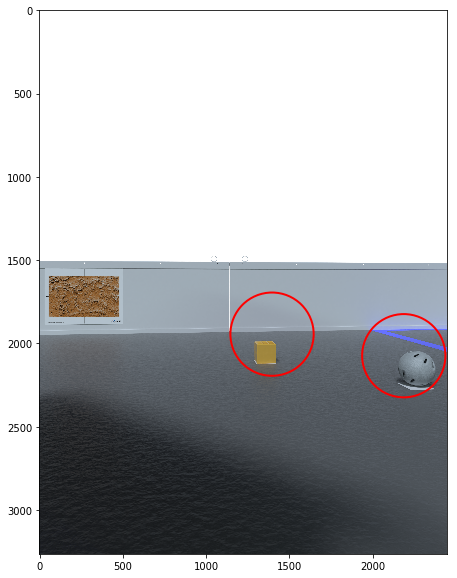

In [13]:
img_size = parsed_data[img_num][1].shape
fig,ax = plt.subplots(1,figsize=(20, 10))
ax.imshow(parsed_data[img_num][1])
draw_circle(ax, img_size[1]*lx, img_size[0]*ly, 250)
draw_circle(ax, img_size[1]*mx, img_size[0]*my, 250)
draw_circle(ax, img_size[1]*rx, img_size[0]*ry, 250)
#draw_circle(ax,1355,2055,100)
#draw_circle(ax,2275,2150,125)
plt.show()